# Build First ML Model Using Python

## Import Necessary Library

In [38]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [39]:
df = pd.read_csv('delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Data Preparation

## Data Separation as X and Y

In [40]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [41]:
# Remove y from datasets
x = df.drop(columns=['logS'])
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
643,3.61260,296.410,0.0,0.272727
722,6.48760,226.448,13.0,0.000000
570,3.15380,284.746,1.0,0.600000
66,0.77880,74.123,2.0,0.000000
1002,1.82140,102.177,3.0,0.000000
...,...,...,...,...
1044,2.82960,253.305,1.0,0.631579
1095,2.10750,218.322,3.0,0.000000
1130,4.14820,335.282,7.0,0.260870
860,4.25720,275.179,4.0,0.352941


In [44]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
218,1.55740,102.177,3.0,0.000000
809,5.20590,345.653,4.0,0.571429
501,4.18090,339.218,4.0,0.545455
649,2.05760,286.349,4.0,0.315789
323,0.72822,146.153,0.0,0.909091
...,...,...,...,...
361,-0.50840,59.068,0.0,0.000000
292,1.94750,116.204,3.0,0.000000
1119,2.16090,257.437,3.0,0.000000
557,3.36680,138.254,0.0,0.000000


# Model Building

## Linear Regression

### Training the Model

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Applying the model to make a prediction

In [62]:
# Calculate predictions for the training set
y_lr_train_pd = lr.predict(x_train)

# Calculate predictions for the test set
y_lr_test_pd = lr.predict(x_test)

In [63]:
y_lr_train_pd

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [64]:
y_lr_train_pd

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

### Value Shape

In [65]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_lr_train_pd shape: {y_lr_train_pd.shape}")
print(f'x_train shape: {x_train.shape}')

y_train shape: (915,)
y_test shape: (229,)
y_lr_train_pd shape: (915,)
x_train shape: (915, 4)


### Evaluate Model performance

In [66]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pd)
lr_train_r2 = r2_score(y_train, y_lr_train_pd)

# Calculate metrics for the test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pd)
lr_test_r2 = r2_score(y_test, y_lr_test_pd)

# Print the results
print(f"Training MSE: {lr_train_mse}, Training R2: {lr_train_r2}")
print(f"Test MSE: {lr_test_mse}, Test R2: {lr_test_r2}")

Training MSE: 1.0139894491573003, Training R2: 0.7695127746587307
Test MSE: 0.9990844407075304, Test R2: 0.7705650058569232


In [67]:
print(f"Train MSE: {lr_train_mse}")
print(f"Train R2: {lr_train_r2}")

print(f"Test MSE: {lr_test_mse}")
print(f"Test R2: {lr_test_r2}")


Train MSE: 1.0139894491573003
Train R2: 0.7695127746587307
Test MSE: 0.9990844407075304
Test R2: 0.7705650058569232


In [89]:

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [90]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


# Random Forest

In [91]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## Applying the model to make a prediction


In [93]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

## Evaluate Model Performance

In [94]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [95]:

rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.057186,0.759694,1.05209,0.758393


# Model comparison


In [96]:
df_models = pd.concat([lr_results, rf_results], ignore_index=True)

In [97]:
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,Random forest,1.057186,0.759694,1.05209,0.758393


In [98]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,Random forest,1.057186,0.759694,1.05209,0.758393


# Data visualization of prediction results


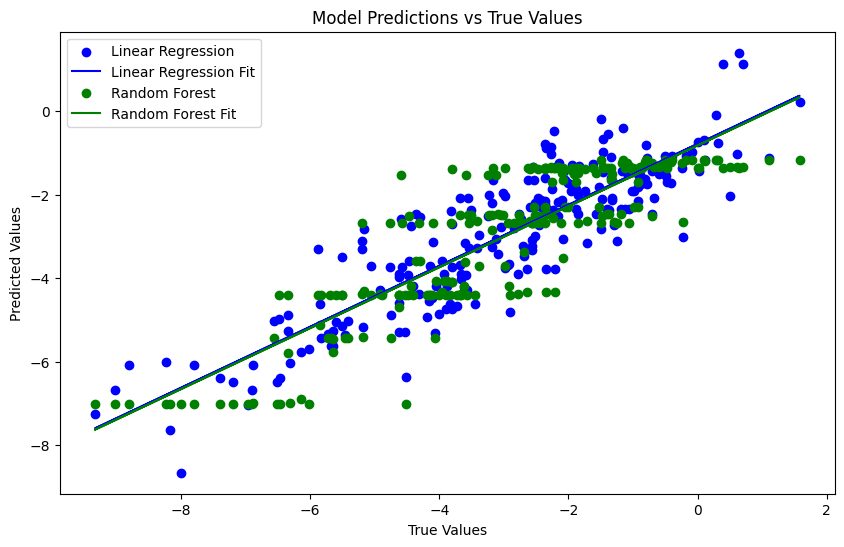

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_test_pd, color='blue', label='Linear Regression')

z = np.polyfit(y_test, y_lr_test_pd, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), color='blue', label='Linear Regression Fit')
plt.scatter(y_test, y_rf_test_pred, color='green', label='Random Forest')
z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='green', label='Random Forest Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()